In [1]:
import numpy as np
import pandas as pd
from src.model.SVM.model_SVM import *
from data_analysis_module import *
import matplotlib.pyplot as plt

In [2]:
data = ManageData()
data.LoadTrainFeatures(path = r'C:\Users\dragu\Desktop\Lumen\Dataset\Dataset\IRMAS_Training_Data_reduced\*\*.wav', label_position = 73)
#data.LoadTrainFeatures()

Training features and labels loaded!
Example:
X: [ 5.45160713e+01  1.51316650e+02 -9.73806190e+00  1.66491127e+01
 -7.97599983e+00  2.17896986e+00 -2.08500195e+01  1.26484375e+01
 -7.47583961e+00  1.93614233e+00  2.35071807e-02  3.41817178e-02
  2.45866667e+03  1.34521724e+03  1.80280151e+03  2.29712715e+01
  2.21845146e+01  2.18128926e+01  2.32285044e+01  1.96685206e+01
  1.79654521e+01  3.13386713e+01  1.87643652e-03  7.37121900e-01
  4.17972972e-01  3.48099931e-01  1.28065735e-01  4.70617104e+00] 
y: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Correlation matrix
Calculating the correlation matrix between different instruments and their various features.\
Features used here are:
- Instrument index
- Mel frequency cepstral coefficients
- Zero crossing rate
- Root mean square
- Roll-off frequency
- Spectral centroid
- Spectral bandwidth
- Spectral contrast
- Spectral flatness
- Permutation entropy
- Spectral entropy
- Singular value decomposition entropy
- Hjorth mobility
- Hjorth complexity

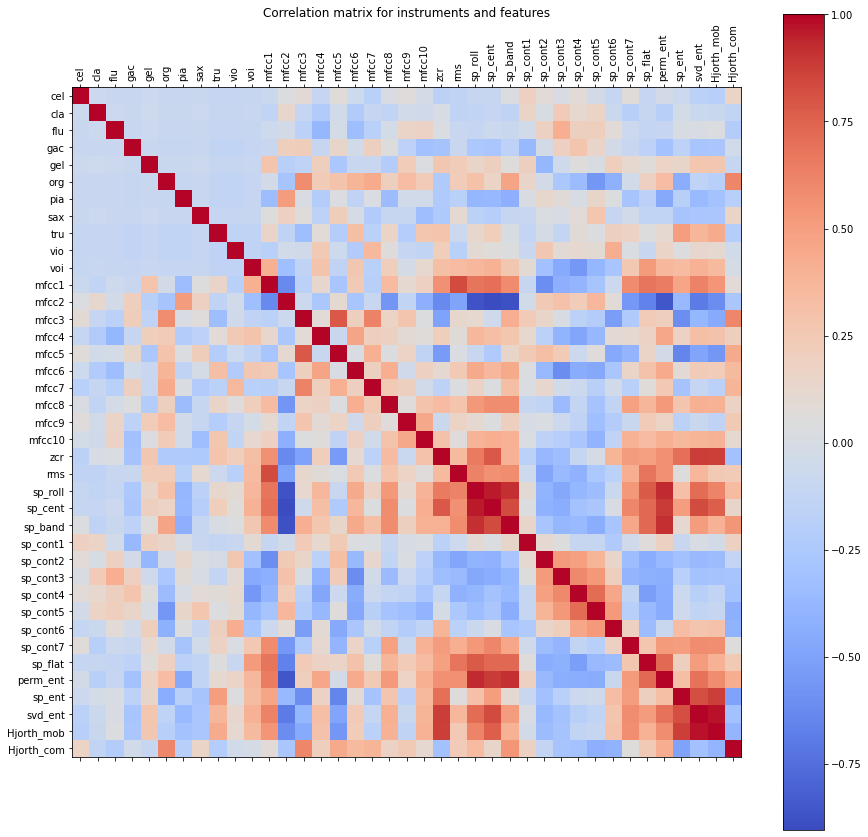

Varijance pojedinog retka (stupca) u korelacijskoj matrici
cel           0.035459
cla           0.038149
flu           0.047592
gac           0.053681
gel           0.050219
org           0.101547
pia           0.064617
sax           0.046946
tru           0.062025
vio           0.047647
voi           0.097137
mfcc1         0.167973
mfcc2         0.177136
mfcc3         0.123088
mfcc4         0.078087
mfcc5         0.111610
mfcc6         0.102290
mfcc7         0.070259
mfcc8         0.095344
mfcc9         0.051153
mfcc10        0.082472
zcr           0.177514
rms           0.121672
sp_roll       0.199686
sp_cent       0.209271
sp_band       0.178529
sp_cont1      0.041194
sp_cont2      0.109114
sp_cont3      0.125840
sp_cont4      0.121121
sp_cont5      0.122707
sp_cont6      0.093759
sp_cont7      0.120986
sp_flat       0.156654
perm_ent      0.195643
sp_ent        0.153919
svd_ent       0.197329
Hjorth_mob    0.189060
Hjorth_com    0.110540
dtype: float64


ValueError: Shape of passed values is (39, 1), indices imply (39, 39)

In [12]:
a = np.concatenate((data.y_train, data.X_train), axis=1)
labels = ['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi',
    'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
    'zcr', 'rms', 'sp_roll', 'sp_cent', 'sp_band',
    'sp_cont1', 'sp_cont2', 'sp_cont3', 'sp_cont4', 'sp_cont5', 'sp_cont6', 'sp_cont7',
    'sp_flat', 'perm_ent', 'sp_ent', 'svd_ent', 'Hjorth_mob', 'Hjorth_com']
df = pd.DataFrame(data=a, columns=labels)
corrM = df.corr()
plt.figure(figsize=(15,15))
plt.matshow(corrM, fignum=0, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation matrix for instruments and features')
plt.xticks(ticks=np.arange(39), labels=labels, rotation='vertical')
plt.yticks(ticks=np.arange(39), labels=labels)
plt.show()
print('Varijance pojedinog retka (stupca) u korelacijskoj matrici')
print(np.var(corrM))
var = pd.DataFrame(data=-np.var(corrM), columns=labels)
display(var)
#plt.savefig(r'.\data\exploratory_data_analysis\figures\instrument_duration_train.png')

In [27]:
print('Top five features with the highest variance:')
var = pd.DataFrame.var(corrM)
var = pd.Series.sort_values(var, ascending= False)
var.head()

Top five features with the highest variance:


sp_cent       0.214778
sp_roll       0.204940
svd_ent       0.202521
perm_ent      0.200792
Hjorth_mob    0.194036
dtype: float64

array([0.21477805, 0.20494046, 0.20252149, 0.20079168, 0.19403569,
       0.18322722, 0.18218545, 0.18179793, 0.1723938 , 0.16077608,
       0.15796997, 0.12915159, 0.12632677, 0.12593582, 0.12487373,
       0.12430792, 0.12417028, 0.11454701, 0.11344869, 0.11198548,
       0.10498209, 0.10421976, 0.09969282, 0.09785298, 0.09622597,
       0.08464254, 0.08014161, 0.07210757, 0.06631778, 0.06365727,
       0.05509325, 0.0524994 , 0.05154055, 0.0489008 , 0.04884493,
       0.04818176, 0.04227785, 0.03915307, 0.03639189])